# Basic classification: Classify images of clothing
#### https://www.tensorflow.org/tutorials/keras/classification
---
### Contents
- Import the Fashine MNIST dataset
- Explore the data
- Preprocess the data
- Build the model
    - Set up the layers
    - Compile the model
- Train the model
- Evaluate accuracy
- Make predictions

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
test_images.shape

(10000, 28, 28)

In [9]:
len(test_labels)

10000

In [10]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

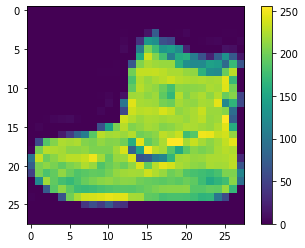

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
train_images = train_images / 255.0
test_images  = test_images  / 255.0

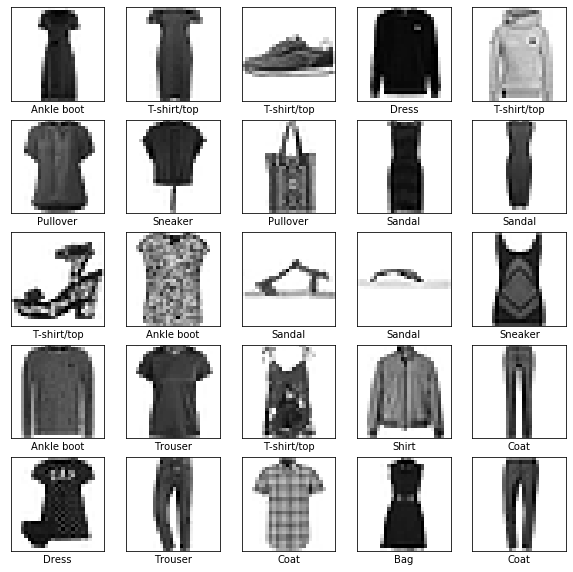

In [17]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i+50], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation=tf.nn.relu),
    layers.Dense(10,  activation=tf.nn.softmax)
])

In [23]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [26]:
model.fit(train_images, train_labels,
          validation_data=[test_images, test_labels],
          epochs=10,
          batch_size=128
          )

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 0.2800 - accuracy: 0.8983 - val_loss: 0.3442 - val_accuracy: 0.8752
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2711 - accuracy: 0.9004 - val_loss: 0.3370 - val_accuracy: 0.8778
Epoch 3/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2651 - accuracy: 0.9025 - val_loss: 0.3302 - val_accuracy: 0.8811
Epoch 4/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2591 - accuracy: 0.9055 - val_loss: 0.3369 - val_accuracy: 0.8796
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2541 - accuracy: 0.9058 - val_loss: 0.3321 - val_accuracy: 0.8803
Epoch 6/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.2497 - accuracy: 0.9079 - val_loss: 0.3311 - val_accuracy: 0.8820
Epoch 7/10
60000/60000 [==============================] 

In [27]:
predictions = model.predict(test_images)

In [28]:
predictions

array([[6.6079764e-08, 5.2820570e-10, 3.8597101e-08, ..., 3.5344514e-03,
        1.2193273e-07, 9.9568981e-01],
       [4.0507775e-06, 1.5900330e-10, 9.9929023e-01, ..., 3.8072183e-14,
        2.7199819e-11, 1.3269437e-15],
       [1.0836384e-07, 9.9999988e-01, 2.5196045e-09, ..., 1.6258602e-17,
        8.3684025e-13, 1.6798096e-15],
       ...,
       [6.6546389e-05, 1.4511325e-10, 6.1576466e-05, ..., 1.0024184e-11,
        9.9974698e-01, 1.8040914e-13],
       [2.3346520e-06, 9.9994648e-01, 1.2275866e-06, ..., 7.8481024e-12,
        1.5651302e-08, 8.1195914e-08],
       [1.7428187e-05, 2.4656854e-08, 3.0642907e-06, ..., 5.5937533e-04,
        4.2621170e-05, 7.7603072e-06]], dtype=float32)

In [29]:
np.argmax(predictions, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else :
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

    
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

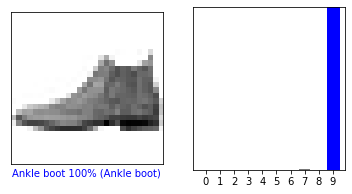

In [39]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

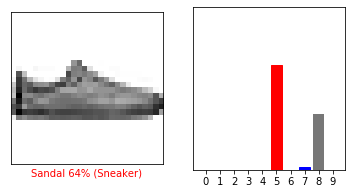

In [40]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

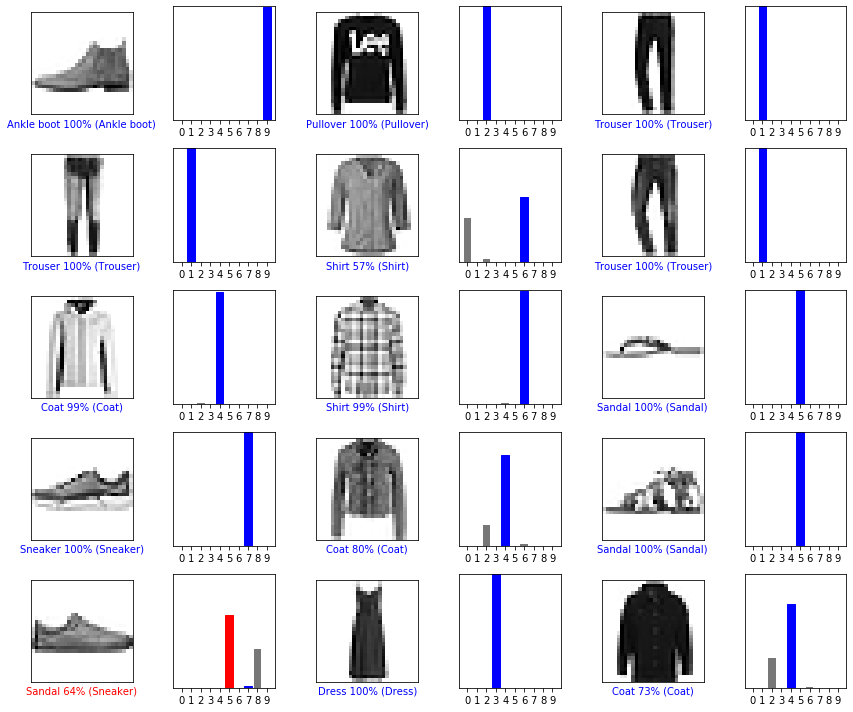

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [42]:
import numpy as np

In [44]:
img = np.expand_dims(test_images[1], 0)
img.shape

(1, 28, 28)

In [46]:
predictions_single = model.predict(img)
predictions_single

array([[4.0507698e-06, 1.5900270e-10, 9.9929023e-01, 1.0959223e-11,
        6.0518028e-04, 2.3036046e-13, 1.0051568e-04, 3.8072183e-14,
        2.7199871e-11, 1.3269437e-15]], dtype=float32)

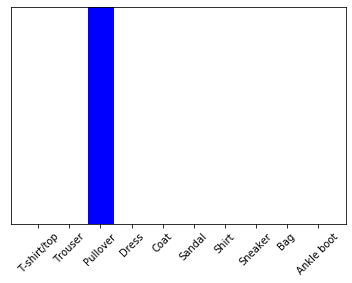

In [49]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)